In [233]:
"""
File : LSTM_training.ipynb
Created by : Amen Ouannes
Brief : Build LSTM models for the training

"""

'\nFile : LSTM_training.ipynb\nCreated by : Amen Ouannes\nBrief : Build LSTM models for the training\n\n'

In [2]:
#importing libraries
import pickle as pk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import importlib
import ML_tools as tools
importlib.reload(tools)
import LSTM_tools as lstm
importlib.reload(lstm)
#Tensorflow for deep learning
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='keras')

2024-08-26 12:59:02.608924: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-26 12:59:02.621498: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-26 12:59:02.621520: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-26 12:59:02.630049: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-26 12:59:03.225028: W tensorflow/compiler/tf

In [137]:
#check that cuda is functioning correctly
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    try:
        # Enable memory growth for the first GPU
        tf.config.experimental.set_memory_growth(physical_devices[0], True)
        print("Memory growth enabled for GPU:", physical_devices[0])
    except RuntimeError as e:
        print(e)
else:
    print("No GPU devices found")


Memory growth enabled for GPU: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


### Dataset treatement

In [103]:
#load ruuvi v1 data
with open('full_datasetv1.pkl', 'rb') as f:
    dataset = pk.load(f)

In [3]:
#load ruuvi v2 data
with open ('full_dataset.pkl', 'rb' ) as f:
    dataset = pk.load(f)

In [6]:
#do proper transformation for the lstm model
list_id = tools.list_id() #import calf macs
calf_values, calf_labels = {}, {}
for key, value in dataset.items(): 
    X, y, label_encoder = lstm.transform_X_y(value) #extract with the convenient number of features
    calf_values[key] = X
    calf_labels[key] = y
assert(len(calf_values) == len(calf_labels))


In [52]:
X_train, X_valid, X_test, y_train, y_valid, y_test = lstm.generate_train(calf_values, calf_labels)
print(X_train[157])
print(y_train[157])

[[ 0.05548597  0.14190368  0.4047562   0.20491914]
 [ 0.04016177  0.19523701  0.4367562   0.23869692]
 [ 0.03031345  0.20359257  0.43373397  0.23034137]
 [ 0.0432122   0.21479256  0.4669784   0.25291914]
 [ 0.09779377  0.13639256  0.36333397  0.24474137]
 [ 0.06492833  0.14933802  0.19707942  0.34277773]
 [ 0.03913736  0.23279257  0.16053396  0.44914138]
 [ 0.04007572  0.24359258  0.14573397  0.45114136]
 [ 0.04016934  0.2671562   0.13162488  0.4605959 ]
 [ 0.04347944  0.24679257  0.10481968  0.4454271 ]
 [ 0.02737607  0.23345923  0.0918673   0.46180803]
 [ 0.03611444  0.25319257  0.02573397  0.48474136]
 [ 0.03237673  0.27719256  0.00653397  0.49754137]
 [ 0.03870754  0.29799256 -0.00306603  0.5167414 ]
 [ 0.04591552  0.21479256  0.01897841  0.47336358]
 [ 0.06927717  0.02759257  0.10893396  0.19834137]
 [ 0.06661331 -0.00920743  0.31926125 -0.07613136]
 [ 0.06073792 -0.02360743  0.37613398 -0.09445863]
 [ 0.01370158  0.01079257  0.40853396 -0.02085863]
 [ 0.04343174 -0.02520743  0.29

In [53]:
print(f'length of a timeframe for a single calf {calf_values[list_id[1]].shape}')
print(f'length of a training set {X_train.shape}, length of training annotations {y_train.shape}')
print(f'length of a validation set {X_valid.shape}, length of validation labels  {y_valid.shape}')
print(f'length of a test set {X_test.shape}, length of test labels  {y_test.shape}')

length of a timeframe for a single calf (604751, 40, 4)
length of a training set (2721379, 40, 4), length of training annotations (2721379, 3)
length of a validation set (151188, 40, 4), length of validation labels  (151188, 3)
length of a test set (151188, 40, 4), length of test labels  (151188, 3)


### build the best model structure

In [60]:
model_flatten = load_model('model_flatten.keras') #load best model
lstm.performances(model_flatten, X_train, y_train, X_valid, y_valid, X_test, y_test) 

14175/14175 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - accuracy: 0.8192 - loss: 0.4629
4725/4725 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8187 - loss: 0.4648
validation set performance = 81.913%
test set performance = 81.850%


In [59]:
model_maxpooling = load_model('model_maxpooling.keras') #load best model
lstm.performances(model_maxpooling, X_train, y_train, X_valid, y_valid, X_test, y_test) 

14175/14175 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - accuracy: 0.8164 - loss: 0.4682
4725/4725 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8160 - loss: 0.4690
validation set performance = 81.685%
test set performance = 81.585%


In [61]:
model_DROP = load_model('model_DROP.keras') #load best model
lstm.performances(model_DROP, X_train, y_train, X_valid, y_valid, X_test, y_test) 

14175/14175 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - accuracy: 0.8115 - loss: 0.4863
4725/4725 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8112 - loss: 0.4882
validation set performance = 81.150%
test set performance = 81.093%


Multi-layer LSTM model 
Built with 4 layers of LSTM

In [230]:
model1 = load_model('model1.keras') #load best model
lstm.performances(model1, X_train, y_train, X_valid, y_valid, X_test, y_test) 

14175/14175 ━━━━━━━━━━━━━━━━━━━━ 48s 3ms/step - accuracy: 0.8251 - loss: 0.4455
4725/4725 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.8249 - loss: 0.4466
validation set performance = 82.544%
test set performance = 82.483%


### Building a final model with the best combination of layers

In [84]:
final_model = Sequential()
#Bi-directional LSTM layers
final_model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(40, 4)))
final_model.add(Bidirectional(LSTM(32, return_sequences=True)))
final_model.add(Bidirectional(LSTM(64, return_sequences=True)))
final_model.add(Dropout(0.5))
#MaxPooling layer to convert the (40, 4) to linear
final_model.add(GlobalMaxPooling1D())  
#fully connected layer
final_model.add(Dense(32, activation='relu'))
#softmax layer for the multi-class classification
final_model.add(Dense(3, activation='softmax'))
final_model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_27                │ (None, 40, 128)        │        35,328 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_28                │ (None, 40, 64)         │        41,216 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_29                │ (None, 40, 128)        │        66,048 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 40, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_4          │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 146,819 (573.51 KB)

 Trainable params: 146,819 (573.51 KB)

 Non-trainable params: 0 (0.00 B)

 #### RUUVI V1

**FULL DATASET**

Epoch 1/20
8064/8064 ━━━━━━━━━━━━━━━━━━━━ 149s 18ms/step - accuracy: 0.7318 - loss: 0.6557 - val_accuracy: 0.7858 - val_loss: 0.5324
Epoch 2/20
8064/8064 ━━━━━━━━━━━━━━━━━━━━ 145s 18ms/step - accuracy: 0.7876 - loss: 0.5321 - val_accuracy: 0.7962 - val_loss: 0.5149
Epoch 3/20
8064/8064 ━━━━━━━━━━━━━━━━━━━━ 146s 18ms/step - accuracy: 0.7986 - loss: 0.5095 - val_accuracy: 0.8086 - val_loss: 0.4872
Epoch 4/20
8064/8064 ━━━━━━━━━━━━━━━━━━━━ 148s 18ms/step - accuracy: 0.8084 - loss: 0.4895 - val_accuracy: 0.8131 - val_loss: 0.4764
Epoch 5/20
8064/8064 ━━━━━━━━━━━━━━━━━━━━ 141s 17ms/step - accuracy: 0.8123 - loss: 0.4803 - val_accuracy: 0.8155 - val_loss: 0.4725
Epoch 6/20
8064/8064 ━━━━━━━━━━━━━━━━━━━━ 143s 18ms/step - accuracy: 0.8158 - loss: 0.4725 - val_accuracy: 0.8173 - val_loss: 0.4683
Epoch 7/20
8064/8064 ━━━━━━━━━━━━━━━━━━━━ 147s 18ms/step - accuracy: 0.8185 - loss: 0.4665 - val_accuracy: 0.8192 - val_loss: 0.4611
Epoch 8/20
8064/8064 ━━━━━━━━━━━━━━━━━━━━ 147s 18ms/step - accuracy: 

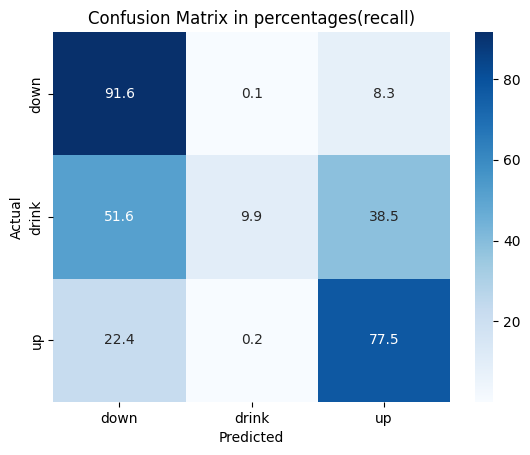

In [96]:
cp = ModelCheckpoint('final_modelv1.keras', save_best_only=True)
final_model.compile(optimizer=Adam(learning_rate=0.001), loss=CategoricalCrossentropy(), metrics=['accuracy'])
with tf.device('/CPU:0'):
    final_model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs = 20, callbacks = [cp], batch_size=300)
final_model = load_model('final_modelv1.keras') #load best model
lstm.performances(final_model, X_train, y_train, X_valid, y_valid, X_test, y_test) 
lstm.confusion_lstm(final_model, X_test, y_test)

#### RUUVI V2 + BEST COMBO OF FEATURE

##### full dataset

In [137]:
#generate model checkpoint and compile it
cp = ModelCheckpoint('final_model.keras', save_best_only=True)
final_model.compile(optimizer=Adam(learning_rate=0.001), loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [138]:
#fitting the model with the use of GPU
with tf.device('/CPU:0'):
    final_model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs = 5, callbacks = [cp], batch_size=300)

Epoch 1/5
8064/8064 ━━━━━━━━━━━━━━━━━━━━ 151s 18ms/step - accuracy: 0.8221 - loss: 0.4908 - val_accuracy: 0.8343 - val_loss: 0.4437
Epoch 2/5
8064/8064 ━━━━━━━━━━━━━━━━━━━━ 143s 18ms/step - accuracy: 0.8445 - loss: 0.4155 - val_accuracy: 0.8371 - val_loss: 0.4324
Epoch 3/5
8064/8064 ━━━━━━━━━━━━━━━━━━━━ 143s 18ms/step - accuracy: 0.8471 - loss: 0.4061 - val_accuracy: 0.8407 - val_loss: 0.4224
Epoch 4/5
8064/8064 ━━━━━━━━━━━━━━━━━━━━ 145s 18ms/step - accuracy: 0.8491 - loss: 0.4011 - val_accuracy: 0.8418 - val_loss: 0.4194
Epoch 5/5
8064/8064 ━━━━━━━━━━━━━━━━━━━━ 149s 18ms/step - accuracy: 0.8493 - loss: 0.3977 - val_accuracy: 0.8438 - val_loss: 0.4139


In [139]:
final_model = load_model('final_model.keras') #load best model
lstm.performances(final_model, X_train, y_train, X_valid, y_valid, X_test, y_test) 

14175/14175 ━━━━━━━━━━━━━━━━━━━━ 49s 3ms/step - accuracy: 0.8504 - loss: 0.3933
4725/4725 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.8490 - loss: 0.3988
validation set performance = 85.110%
test set performance = 84.860%


4725/4725 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


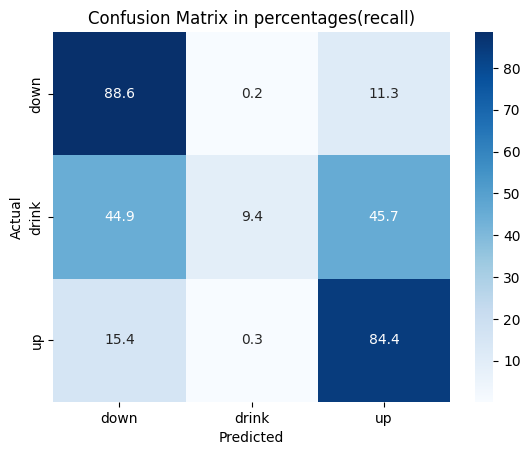

In [140]:
lstm.confusion_lstm(final_model, X_test, y_test)

##### WEIGHTED CLASSIFICATION

[0 2 0 ... 0 1 0]
[0 1 2] [1637356  154675  627153]
{0: 0.4924980680234883, 1: 5.21347772210549, 2: 1.2858021354703983}
Epoch 1/5
8064/8064 ━━━━━━━━━━━━━━━━━━━━ 149s 18ms/step - accuracy: 0.7431 - loss: 0.6025 - val_accuracy: 0.7451 - val_loss: 0.5722
Epoch 2/5
8064/8064 ━━━━━━━━━━━━━━━━━━━━ 145s 18ms/step - accuracy: 0.7441 - loss: 0.5963 - val_accuracy: 0.7257 - val_loss: 0.5984
Epoch 3/5
8064/8064 ━━━━━━━━━━━━━━━━━━━━ 148s 18ms/step - accuracy: 0.7453 - loss: 0.5900 - val_accuracy: 0.7231 - val_loss: 0.5940
Epoch 4/5
8064/8064 ━━━━━━━━━━━━━━━━━━━━ 146s 18ms/step - accuracy: 0.7458 - loss: 0.5870 - val_accuracy: 0.7280 - val_loss: 0.5921
Epoch 5/5
8064/8064 ━━━━━━━━━━━━━━━━━━━━ 140s 17ms/step - accuracy: 0.7462 - loss: 0.5844 - val_accuracy: 0.7183 - val_loss: 0.6094
14175/14175 ━━━━━━━━━━━━━━━━━━━━ 43s 3ms/step - accuracy: 0.7144 - loss: 0.6508
4725/4725 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.7092 - loss: 0.6598
validation set performance = 71.760%
test set performance = 70

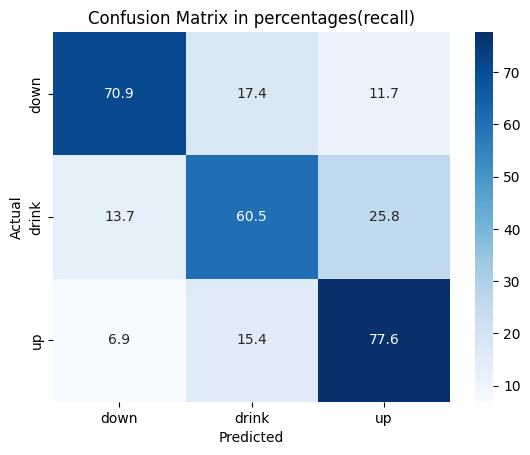

In [143]:
#train the model with keeping in mind the existence of class imbalance
from sklearn.utils.class_weight import compute_class_weight
y_train_labels = np.argmax(y_train, axis=1)
unique_values, counts = np.unique(y_train_labels, return_counts=True)

# Compute class weights
classes = np.unique(y_train_labels)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train_labels)
class_weight_dict = dict(zip(classes, class_weights))
sample_weights = np.array([class_weights[label] for label in y_train_labels])

cp = ModelCheckpoint('weighted.keras', save_best_only=True)
final_model.compile(optimizer=Adam(learning_rate=0.001), loss=CategoricalCrossentropy(), metrics=['accuracy'])

with tf.device('/CPU:0'):
    final_model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs = 5, sample_weight=sample_weights, callbacks = [cp], batch_size=300)
final_model = load_model('weighted.keras') #load best model
lstm.performances(final_model, X_train, y_train, X_valid, y_valid, X_test, y_test)
lstm.confusion_lstm(final_model, X_test, y_test)

##### UNDERSAMPLED DATASET MODEL

In [43]:
cp = ModelCheckpoint('undersampled_40_20.keras', save_best_only=True)
final_model.compile(optimizer=Adam(learning_rate=0.001), loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [54]:
#generate balanced train
X_train, X_valid, X_test, y_train, y_valid, y_test = lstm.generate_train_sampled(calf_values, calf_labels)

In [55]:
print(f'length of a timeframe for a single calf {calf_values[list_id[1]].shape}')
print(f'length of a training set {X_train.shape}, length of training annotations {y_train.shape}')
print(f'length of a validation set {X_valid.shape}, length of validation labels  {y_valid.shape}')
print(f'length of a test set {X_test.shape}, length of test labels  {y_test.shape}')

length of a timeframe for a single calf (604751, 40, 4)
length of a training set (522463, 40, 4), length of training annotations (522463, 3)
length of a validation set (29026, 40, 4), length of validation labels  (29026, 3)
length of a test set (29026, 40, 4), length of test labels  (29026, 3)


Epoch 1/20
1742/1742 ━━━━━━━━━━━━━━━━━━━━ 38s 21ms/step - accuracy: 0.6764 - loss: 0.6952 - val_accuracy: 0.7377 - val_loss: 0.6401
Epoch 2/20
1742/1742 ━━━━━━━━━━━━━━━━━━━━ 36s 21ms/step - accuracy: 0.7451 - loss: 0.5595 - val_accuracy: 0.7638 - val_loss: 0.5896
Epoch 3/20
1742/1742 ━━━━━━━━━━━━━━━━━━━━ 36s 21ms/step - accuracy: 0.7693 - loss: 0.5144 - val_accuracy: 0.7898 - val_loss: 0.5447
Epoch 4/20
1742/1742 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 0.7912 - loss: 0.4749 - val_accuracy: 0.8009 - val_loss: 0.5132
Epoch 5/20
1742/1742 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 0.8128 - loss: 0.4355 - val_accuracy: 0.8258 - val_loss: 0.4668
Epoch 6/20
1742/1742 ━━━━━━━━━━━━━━━━━━━━ 36s 21ms/step - accuracy: 0.8330 - loss: 0.3988 - val_accuracy: 0.8381 - val_loss: 0.4379
Epoch 7/20
1742/1742 ━━━━━━━━━━━━━━━━━━━━ 37s 21ms/step - accuracy: 0.8497 - loss: 0.3666 - val_accuracy: 0.8563 - val_loss: 0.4020
Epoch 8/20
1742/1742 ━━━━━━━━━━━━━━━━━━━━ 36s 21ms/step - accuracy: 0.8650 -

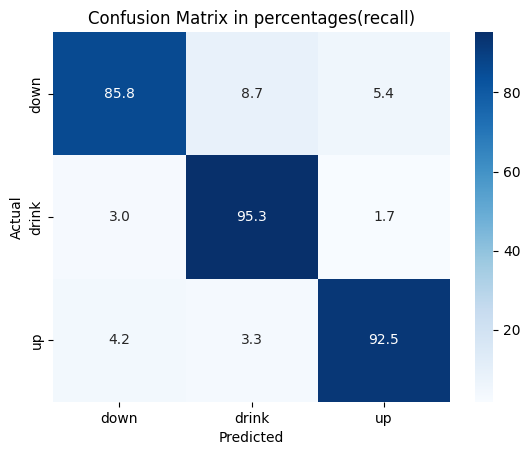

In [44]:
#fitting the model with the use of GPU
with tf.device('/CPU:0'):
    final_model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs = 20, callbacks = [cp], batch_size=300)
final_model = load_model('undersampled_40_20.keras') #load best model
lstm.performances(final_model, X_train, y_train, X_valid, y_valid, X_test, y_test)
lstm.confusion_lstm(final_model, X_test, y_test)

Epoch 1/20
1740/1740 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.7385 - loss: 0.5797 - val_accuracy: 0.7981 - val_loss: 0.4394
Epoch 2/20
1740/1740 ━━━━━━━━━━━━━━━━━━━━ 34s 19ms/step - accuracy: 0.8086 - loss: 0.4266 - val_accuracy: 0.8251 - val_loss: 0.3961
Epoch 3/20
1740/1740 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - accuracy: 0.8237 - loss: 0.3950 - val_accuracy: 0.8315 - val_loss: 0.3746
Epoch 4/20
1740/1740 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - accuracy: 0.8321 - loss: 0.3748 - val_accuracy: 0.8361 - val_loss: 0.3630
Epoch 5/20
1740/1740 ━━━━━━━━━━━━━━━━━━━━ 34s 19ms/step - accuracy: 0.8392 - loss: 0.3605 - val_accuracy: 0.8382 - val_loss: 0.3600
Epoch 6/20
1740/1740 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - accuracy: 0.8432 - loss: 0.3502 - val_accuracy: 0.8426 - val_loss: 0.3453
Epoch 7/20
1740/1740 ━━━━━━━━━━━━━━━━━━━━ 34s 19ms/step - accuracy: 0.8482 - loss: 0.3410 - val_accuracy: 0.8489 - val_loss: 0.3322
Epoch 8/20
1740/1740 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - accuracy: 0.8524 -

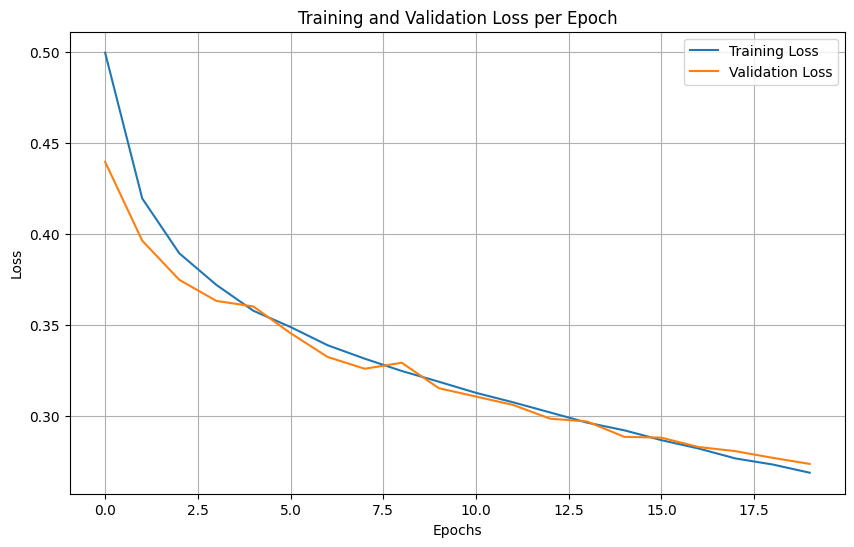

In [174]:
with tf.device('/CPU:0'):
    history = final_model.fit(X_train, y_train, validation_data=(X_valid, y_valid), 
                              epochs=20, callbacks=[cp], batch_size=300)

    # Plotting the training and validation loss
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss per Epoch')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

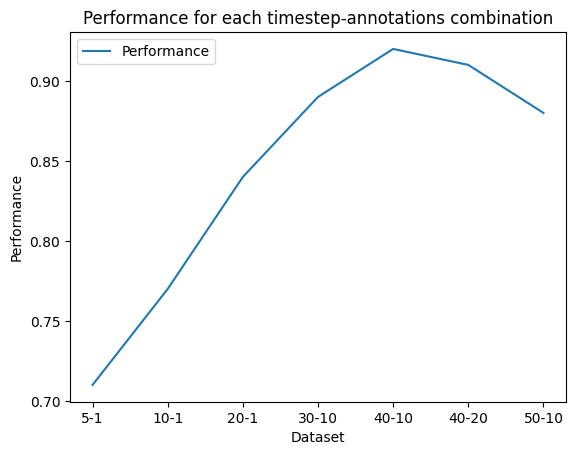

In [56]:
# Correct y values (percentages as decimals)
x = ['5-1', '10-1', '20-1', '30-10', '40-10', '40-20', '50-10']
y = [0.71, 0.77, 0.84, 0.89, 0.92, 0.91, 0.88]

plt.plot(x, y, label="Performance")  # Added label for legend
# Add labels and title
plt.xlabel('Dataset')
plt.ylabel('Performance')
plt.title('Performance for each timestep-annotations combination')
plt.legend()  # Adds the legend with the label "Performance"

# Show the plot
plt.show()

### Leave one calf out 

In [87]:
one_calf = Sequential()
one_calf.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(40, 4)))
one_calf.add(Bidirectional(LSTM(32, return_sequences=True)))
one_calf.add(Bidirectional(LSTM(64, return_sequences=True)))
one_calf.add(Dropout(0.5))
one_calf.add(Dense(32, activation='relu'))
#final_model.add(Dense(16, activation='relu'))
one_calf.add(Flatten())
one_calf.add(Dense(3, activation='softmax')) 
one_calf.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_30                │ (None, 40, 128)        │        35,328 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_31                │ (None, 40, 64)         │        41,216 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_32                │ (None, 40, 128)        │        66,048 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 40, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 40, 32)         │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 3)              │         3,843 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 150,563 (588.14 KB)

 Trainable params: 150,563 (588.14 KB)

 Non-trainable params: 0 (0.00 B)

In [88]:
#generate model checkpoint and compile it
cp = ModelCheckpoint('one_calf.keras', save_best_only=True)
one_calf.compile(optimizer=Adam(learning_rate=0.001), loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [85]:
def train_lstm(calf_values, calf_labels, list_id,features=4):
    performances = []
    for i in list_id:
        X_train, X_valid, X_test, y_train, y_valid, y_test = lstm.leave_one_calf_out(calf_values, calf_labels, i, features)
        with tf.device('/CPU:0'):
            one_calf.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs = 10, callbacks = [cp], batch_size=300)
        train_loss, train_accuracy = one_calf.evaluate(X_train, y_train)
        valid_loss, valid_accuracy = one_calf.evaluate(X_valid, y_valid)
        test_loss, test_accuracy = one_calf.evaluate(X_test, y_test)
        performances.append((train_accuracy, valid_accuracy,test_accuracy))
    return performances

In [89]:
performances = train_lstm(calf_values, calf_labels, list_id)

Epoch 1/10
8064/8064 ━━━━━━━━━━━━━━━━━━━━ 235s 29ms/step - accuracy: 0.8814 - loss: 0.3352 - val_accuracy: 0.7683 - val_loss: 0.9189
Epoch 2/10
8064/8064 ━━━━━━━━━━━━━━━━━━━━ 246s 31ms/step - accuracy: 0.9209 - loss: 0.2277 - val_accuracy: 0.7424 - val_loss: 1.2633
Epoch 3/10
8064/8064 ━━━━━━━━━━━━━━━━━━━━ 245s 30ms/step - accuracy: 0.9386 - loss: 0.1740 - val_accuracy: 0.7295 - val_loss: 1.5213
Epoch 4/10
8064/8064 ━━━━━━━━━━━━━━━━━━━━ 231s 29ms/step - accuracy: 0.9544 - loss: 0.1293 - val_accuracy: 0.7238 - val_loss: 1.8512
Epoch 5/10
8064/8064 ━━━━━━━━━━━━━━━━━━━━ 238s 29ms/step - accuracy: 0.9657 - loss: 0.0979 - val_accuracy: 0.7106 - val_loss: 2.0375
Epoch 6/10
8064/8064 ━━━━━━━━━━━━━━━━━━━━ 246s 30ms/step - accuracy: 0.9730 - loss: 0.0780 - val_accuracy: 0.6975 - val_loss: 2.3100
Epoch 7/10
8064/8064 ━━━━━━━━━━━━━━━━━━━━ 248s 31ms/step - accuracy: 0.9781 - loss: 0.0639 - val_accuracy: 0.7040 - val_loss: 2.4686
Epoch 8/10
8064/8064 ━━━━━━━━━━━━━━━━━━━━ 239s 30ms/step - accuracy: 

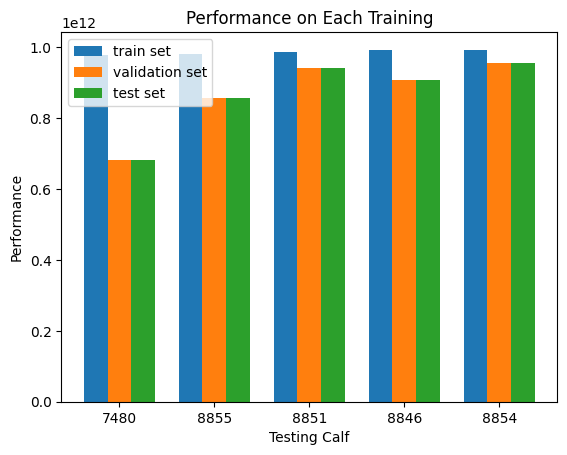

In [99]:
import matplotlib.pyplot as plt
import numpy as np
macs= {"D1:B6:FC:34:99:3A" : 7480, "F4:CC:E1:C5:8A:A9" :8855,
       "FB:E5:24:5B:8A:68" : 8851, "D0:C9:50:5E:88:F8" :8846, "D3:6B:03:69:94:4E" : 8854}

# List of MAC addresses (keys)
list_id = list(macs.keys())

# Extract x_values based on list_id order
x_values = [macs[key] for key in list_id]

# Assuming performances is a list of 3D tuples
performances = np.array(performances)

# Split the 3D tuples into separate sets
performances_set1 = performances[:, 0]
performances_set2 = performances[:, 1]
performances_set3 = performances[:, 2]

# Bar width and x positions
bar_width = 0.25
x = np.arange(len(list_id))

# Plotting
fig, ax = plt.subplots()

# Plotting the bars for each set
bar1 = ax.bar(x - bar_width, performances_set1, bar_width, label='train set')
bar2 = ax.bar(x, performances_set2, bar_width, label='validation set')
bar3 = ax.bar(x + bar_width, performances_set3, bar_width, label='test set')

# Setting labels and title
ax.set_xlabel('Testing Calf')
ax.set_ylabel('Performance')
ax.set_title('Performance on Each Training')
ax.set_xticks(x)
ax.set_xticklabels(x_values)
ax.legend()

# Show the plot
plt.show()

In [105]:
print(f'validation set global performances : {performances_set1.mean()/10000000000:.2f}%')
print(f'test set global performances : {performances_set2.mean()/10000000000:.2f}%')

validation set global performances : 98.71%
test set global performances : 86.93%
